# Rotational modulation
Suppose you want to observe 100 stars with randomly drawn stellar inclinations, each with spot contrast c=0.7 (where c=0 means perfectly dark spots), with quadratic limb-darkening. Let’s distribute three spots on each star randomly above 70 degrees latitude up to the pole. We can use the generate_spots method to quickly create spot property matrices in the correct shape:

In [1]:
from fleck import generate_spots

spot_contrast = 0.7
u_ld = [0.5079, 0.2239]

n_phases = 30
n_inclinations = 100
n_spots = 3

spot_radius = 0.1   # Rspot/Rstar
min_latitude = 70   # deg
max_latitude = 90   # deg

lons, lats, radii, inc_stellar = generate_spots(min_latitude, max_latitude,
                                                spot_radius, n_spots,
                                                n_inclinations=n_inclinations)

lons, lats, radii will each have shape (n_spots, n_inclinations) and inc_stellar will have shape (n_inclinations, ). Now let’s initialize a Star object:

In [2]:
from fleck import Star

star = Star(spot_contrast=spot_contrast, n_phases=n_phases, u_ld=u_ld)

If we initialize the Star object with a number of phases n_phases, it will evenly sample all phases on (0, 2pi)

Now we can compute light curves for stars with the spots we generated like so:

In [3]:
lcs = star.light_curve(lons, lats, radii, inc_stellar)

where lcs will have shape (n_phases, n_inclinations). Let’s plot each of the light curves:

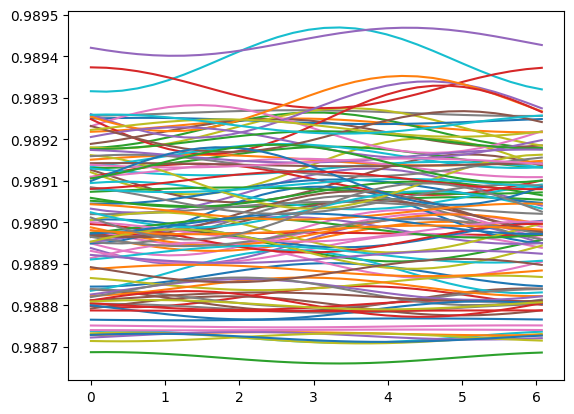

In [4]:
import matplotlib.pyplot as plt
plt.plot(star.phases, lcs)
plt.show()

# Spot Occultations
Now let’s make a transiting exoplanet, and observe spot occultations. We can specify the parameters of the transiting exoplanet using the same specification used by batman:

In [8]:
from batman import TransitParams
import astropy.units as u

planet = TransitParams()
planet.per = 88
planet.a = float(0.387*u.AU / u.R_sun)
planet.rp = 0.1
planet.w = 90
planet.ecc = 0
planet.inc = 90
planet.t0 = 0
planet.limb_dark = 'quadratic'
planet.u = [0.5079, 0.2239]